In [2]:
# Setup matplotlib to plot inline (within the notebook)
%matplotlib inline

# Import the pyplot module of Matplotlib as plt
import matplotlib.pyplot as plt

# Import pandas under the abbreviation 'pd'
import pandas as pd

# Import NumPy under the abbreviation 'np'
import numpy as np

## End-to-end Scikit-Learn classification workflow
Let's start with an end to end Scikit-Learn workflowdictions


1. Get a dataset ready
2. Prepare a machine learning model to make predictions
3. Fit the model to the data and make a prediction
4. Evaluate the model's predictions

## 1. Getting dataset ready

In [8]:
# Loading data from csv using pandas
heart_disease = pd.read_csv("heart-disease.csv")

# seeing the first 5 rows of the df
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [12]:
# Separating our data set in two variables X our input data and Y our target data (or result data)
X = heart_disease.drop(columns=["target"])
Y = heart_disease["target"]

In [14]:
from sklearn.model_selection import train_test_split;

# Usig scikit-learn to split our data into traing and test datasets
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2);

In [15]:
# View the different shapes of the training and test datasets
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape 

((242, 13), (61, 13), (242,), (61,))

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
289,55,0,0,128,205,0,2,130,1,2.0,1,1,3
55,52,1,1,134,201,0,1,158,0,0.8,2,1,2
215,43,0,0,132,341,1,0,136,1,3.0,1,0,3
30,41,0,1,105,198,0,1,168,0,0.0,2,1,2
231,57,1,0,165,289,1,0,124,0,1.0,1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,65,1,0,135,254,0,0,127,0,2.8,1,1,3
204,62,0,0,160,164,0,0,145,0,6.2,0,3,3
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0
120,64,0,0,130,303,0,1,122,0,2.0,1,2,2


# 2. Preparing a machine learning Model

In [45]:
# Import the RandomForestClassifier from sklearn's ensemble module
from sklearn.ensemble import RandomForestClassifier

In [46]:
# Instantiate an instance of RandomForestClassifier as clf
clf = RandomForestClassifier()

# 3. Fitting a model and making predictions

In [48]:
# Fit the RandomForestClassifier to the training data
clf.fit(X_train,Y_train);

In [49]:
# Use the fitted model to make predictions on the test data and
# save the predictions to a variable called y_preds
y_preds = clf.predict(X_test)

# 4. Evaluating a models's predictions

In [51]:
# Evaluate the fitted model on the training set using the score() function
clf.score(X_train,Y_train)

1.0

In [52]:
# Evaluate the fitted model on the test set using the score() function
clf.score(X_test,Y_test)

0.8360655737704918

## Trying other ML models.

Here im going to be build other ML models for the Heart disease data set. 
The idea is to test all of these ML models
LinearSVC
KNeighborsClassifier (also known as K-Nearest Neighbors or KNN)
SVC (also known as support vector classifier, a form of support vector machine)
LogisticRegression (despite the name, this is actually a classifier)
RandomForestClassifier (an ensemble method and what we used above)

In [6]:
# Import LinearSVC from sklearn's svm module
from sklearn.svm import LinearSVC

# Import KNeighborsClassifier from sklearn's neighbors module
from sklearn.neighbors import KNeighborsClassifier

# Import SVC from sklearn's svm module
from sklearn.svm import SVC

# Import LogisticRegression from sklearn's linear_model module
from sklearn.linear_model import LogisticRegression

# Note: we don't have to import RandomForestClassifier, since we already have


In [66]:
# Create a dictionary called models which contains all of the classification models we've imported
# Make sure the dictionary is in the same format as example_dict
# The models dictionary should contain 5 models

models_dictionary = {"linearSVC":LinearSVC(), 
                     "KNeighbors":KNeighborsClassifier(),
                     "SuportVector": SVC(),
                     "LogisticRegression": LogisticRegression(),
                     "RndForestClf": RandomForestClassifier()};

# Create an empty dictionary called results
results = {"linearSVC":None, 
           "KNeighbors":None,
           "SuportVector": None,
           "LogisticRegression": None,
           "RndForestClf": None};

In [74]:
import warnings
warnings.filterwarnings("ignore")

for key, value in models_dictionary.items():
    models_dictionary[key].fit(X_train,Y_train);
    results[key] = models_dictionary[key].score(X_test,Y_test);
    print(f"For {key} model the score is {results[key]}")

For linearSVC model the score is 0.4426229508196721
For KNeighbors model the score is 0.6557377049180327
For SuportVector model the score is 0.7213114754098361
For LogisticRegression model the score is 0.8360655737704918
For RndForestClf model the score is 0.8524590163934426


In [101]:
# Run the same code as the cell above, except this time set a NumPy random seed
# equal to 42
np.random.seed(42)
    
for key, value in models_dictionary.items():
    models_dictionary[key].fit(X_train,Y_train);
    results[key] = models_dictionary[key].score(X_test,Y_test);
    print(f"For {key} model the score is {results[key]}")

For linearSVC model the score is 0.8688524590163934
For KNeighbors model the score is 0.6557377049180327
For SuportVector model the score is 0.7213114754098361
For LogisticRegression model the score is 0.8360655737704918
For RndForestClf model the score is 0.8360655737704918


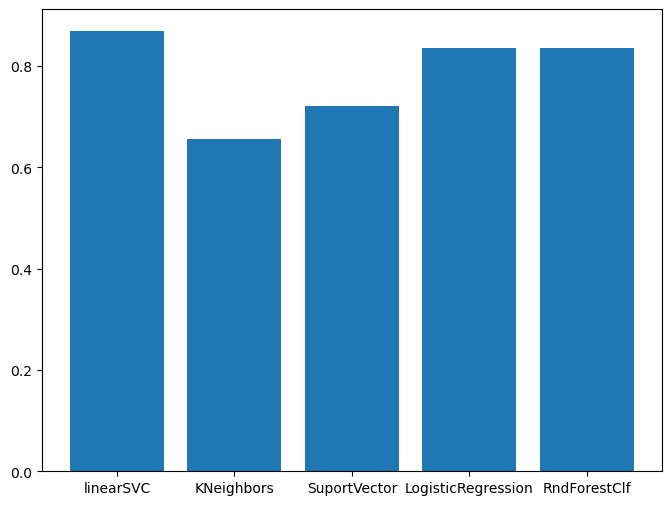

In [108]:
# Create a pandas dataframe with the data as the values of the results dictionary,
# the index as the keys of the results dictionary and a single column called accuracy.
# Be sure to save the dataframe to a variable.
results_df = pd.DataFrame(index = results.keys(), 
                          data = results.values(), 
                          columns= ["Accuracy"]);
results_df

# Create a bar plot of the results dataframe using plot.bar()
plt.figure(figsize=(8,6));
plt.bar(results.keys(), results.values());
#results_df.plot(x = "Model", y = "Accuracy", kind = "bar")

## Hyperparameter Tuning
Remember, if you're ever trying to tune a machine learning models hyperparameters and you're not sure where to start, you can always search something like "MODEL_NAME hyperparameter tuning".

In the case of LogisticRegression, you might come across articles, such as Hyperparameter Tuning Using Grid Search by Chris Albon.

The article uses GridSearchCV but we're going to be using RandomizedSearchCV.

The different hyperparameters to search over have been setup for you in log_reg_grid but feel free to change
 them.

In [3]:
# Different LogisticRegression hyperparameters
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

In [16]:
# Setup np random seed of 42
np.random.seed(42);

# Import RandomizedSearchCV from sklearn's model_selection module
from sklearn.model_selection import RandomizedSearchCV;

# Setup an instance of RandomizedSearchCV with a LogisticRegression() estimator,
# our log_reg_grid as the param_distributions, a cv of 5 and n_iter of 5.
rs_log_reg = RandomizedSearchCV(estimator=LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=5,
                                verbose=2);

# Fit the instance of RandomizedSearchCV
rs_log_reg.fit(X_train,Y_train);

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END ...............C=1438.44988828766, solver=liblinear; total time=   0.0s
[CV] END ...............C=1438.44988828766, solver=liblinear; total time=   0.0s
[CV] END ...............C=1438.44988828766, solver=liblinear; total time=   0.0s
[CV] END ...............C=1438.44988828766, solver=liblinear; total time=   0.0s
[CV] END ...............C=1438.44988828766, solver=liblinear; total time=   0.0s
[CV] END ...............C=206.913808111479, solver=liblinear; total time=   0.0s
[CV] END ...............C=206.913808111479, solve

In [17]:
# Find the best parameters of the RandomizedSearchCV instance using the best_params_ attribute
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [18]:
# Score the instance of RandomizedSearchCV using the test data
rs_log_reg.score(X_test,Y_test)

0.8852459016393442

## Classifier Model Evaluation

We've tried to find the best hyperparameters on our model using RandomizedSearchCV and so far we've only been evaluating our model using the score() function which returns accuracy.

But when it comes to classification, you'll likely want to use a few more evaluation metrics, including:

Confusion matrix - Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagnol line).
Cross-validation - Splits your dataset into multiple parts and train and tests your model on each part and evaluates performance as an average.
Precision - Proportion of true positives over total number of samples. Higher precision leads to less false positives.
Recall - Proportion of true positives over total number of true positives and false positives. Higher recall leads to less false negatives.
F1 score - Combines precision and recall into one metric. 1 is best, 0 is worst.
Classification report - Sklearn has a built-in function called classification_report() which returns some of the main classification metrics such as precision, recall and f1-score.
ROC Curve - Receiver Operating Characterisitc is a plot of true positive rate versus false positive rate.
Area Under Curve (AUC) - The area underneath the ROC curve. A perfect model achieves a score of 1.0.
Before we get to these, we'll instantiate a new instance of our model using the best hyerparameters found by RandomizedSearchCV.

In [20]:
# Instantiate a LogisticRegression classifier using the best hyperparameters from RandomizedSearchCV
clf = LogisticRegression(solver = rs_log_reg.best_params_["solver"], C = rs_log_reg.best_params_["C"])

# Fit the new instance of LogisticRegression with the best hyperparameters on the training data 
clf.fit(X_train,Y_train);

Now it's to import the relative Scikit-Learn methods for each of the classification evaluation metrics we're after.

In [56]:
# Import confusion_matrix and classification_report from sklearn's metrics module
from sklearn.metrics import confusion_matrix, classification_report;

# Import precision_score, recall_score and f1_score from sklearn's metrics module
from sklearn.metrics import precision_score, recall_score, f1_score;

# Import plot_roc_curve from sklearn's metrics module
from sklearn.metrics import plot_roc_curve
#import sklearn
#print(sklearn.__version__)

ImportError: cannot import name 'plot_roc_curve' from 'sklearn.metrics' (C:\Users\Carmen\Desktop\sample_project_1\env\Lib\site-packages\sklearn\metrics\__init__.py)

In [53]:
# Make predictions on test data and save them
predictions = clf.predict(X_test)

In [58]:
# Create a confusion matrix using the confusion_matrix function
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(Y_test, predictions)
conf_matrix

array([[25,  4],
       [ 3, 29]], dtype=int64)

# Create a more visual confusion matrix

Ill be doing this using matplotlib and build in display of confusion matrix instance

## Plotting Confusion Matrix using Matplotlib


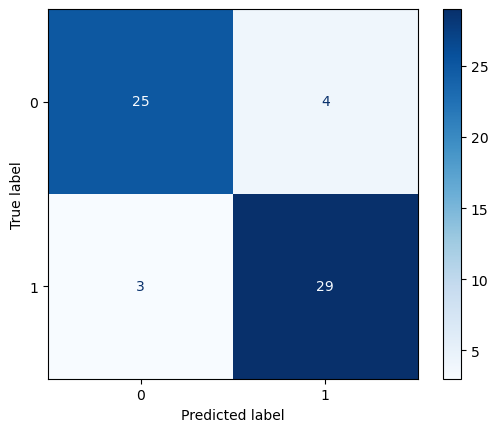

In [61]:
from sklearn.metrics import ConfusionMatrixDisplay;

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix);
disp.plot(cmap="Blues")

In [64]:
# Create a classification report using the classification_report function
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [65]:
# Find the precision score of the model using precision_score()
precision_score(Y_test, predictions)

0.8787878787878788

In [66]:
# Find the recall score
recall_score(Y_test,predictions)

0.90625